In [20]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
fake_df = pd.read_csv("./Fake.csv")
true_df = pd.read_csv("./True.csv")

fake_df['label'] = 0   # Fake news
true_df['label'] = 1   # Real news

df = pd.concat([fake_df, true_df], axis=0) 
df = df.sample(frac=1).reset_index(drop=True)

df.head()


,title,text,subject,date,label
0,Good Side? Barbra Streisand Would Only Be Phot...,This is rich! We ve heard for years about the ...,left-news,"Sep 20, 2017",0
1,Republican Debate Screeches To A Halt After T...,Fox Business held their second Republican deba...,News,"January 14, 2016",0
2,Holocaust Survivor Says Donald Trump Reminds ...,Donald Trump is literally scaring Holocaust su...,News,"March 7, 2016",0
3,Canada to take in migrants at 'gradual' pace a...,TORONTO (Reuters) - Canada has to take a gradu...,worldnews,"November 2, 2017",1
4,Trump Blames Baton Rouge Police Shooting On O...,Following the tragic shooting of several polic...,News,"July 17, 2016",0


In [24]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (44898, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [25]:


def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['text'] = df['text'].apply(clean_text)



In [26]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:

tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.7,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


model = LinearSVC()
model.fit(X_train_tfidf, y_train)


LinearSVC()

In [28]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9948775055679288

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4734
           1       0.99      1.00      0.99      4246

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



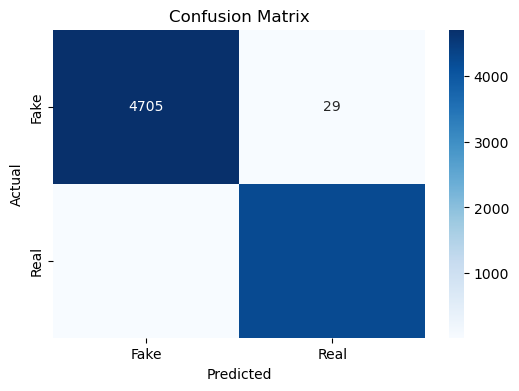

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [30]:

sample_news = [
    "WASHINGTON (Reuters) - The United States government announced on Tuesday that it will increase funding for renewable energy projects as part of a broader climate initiative."
]

sample_cleaned = [clean_text(sample_news[0])]
sample_vector = tfidf.transform(sample_cleaned)

prediction = model.predict(sample_vector)

print("Prediction:", "Real News" if prediction[0] == 1 else "Fake News")



Prediction: Real News


In [31]:

sample_news = [
    "Breaking news! Scientists confirm water cures cancer."
]

sample_cleaned = [clean_text(sample_news[0])]
sample_vector = tfidf.transform(sample_cleaned)
prediction = model.predict(sample_vector)

print("Sample News:")
print(sample_news[0])
print("\nModel Prediction:", "Real News" if prediction[0] == 1 else "Fake News")

Sample News:
Breaking news! Scientists confirm water cures cancer.

Model Prediction: Fake News
